<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

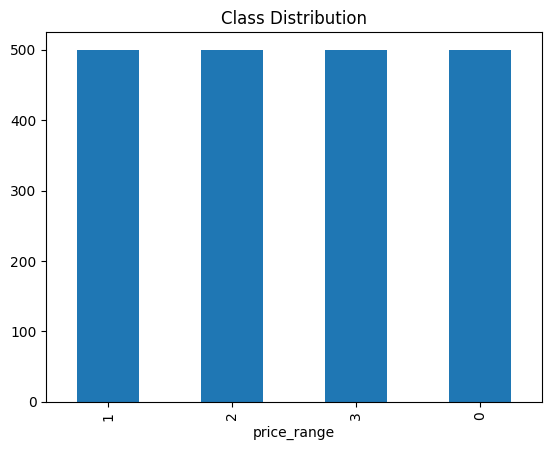

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Logistic Regression ---
Accuracy: 0.965
Confusion Matrix:
[[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400


--- Decision Tree ---
Accuracy: 0.83
Confusion Matrix:
[[92  8  0  0]
 [13 74 13  0]
 [ 0 13 80  7]
 [ 0  0 14 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    ac

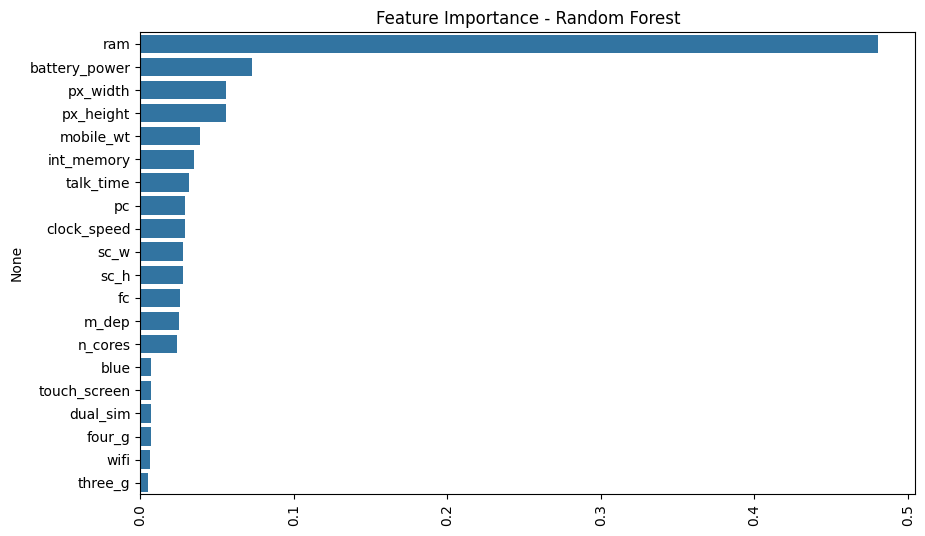

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("phoneprice.csv")
df.head()
df.info()
df['price_range'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()
df['price_range'].value_counts().sort_index()
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
def evaluate(model_name, y_true, y_pred):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate("Logistic Regression", y_test, pred_lr)
evaluate("Decision Tree", y_test, pred_dt)
evaluate("Random Forest", y_test, pred_rf)

importances = rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=90)
plt.show()


## Project Summary

This project predicts the price category of mobile phones using features like battery, RAM, internal memory, screen size, camera, etc.

Three models were trained:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

Random Forest performed the best with the highest accuracy.

The most important features were RAM, battery power, and pixel resolution.

Target labels:
- 0 = Low cost
- 1 = Medium cost
- 2 = High cost
- 3 = Very high cost
